# The Sparks Foundation
## Data Science & Business Analytics Tasks - July 2021
### Task 1 - Prediction using Supervised ML
### Task : What will be predicted score if a student studies for 9.25 hrs/ day?
#### Submitted by : Trupti Kadam
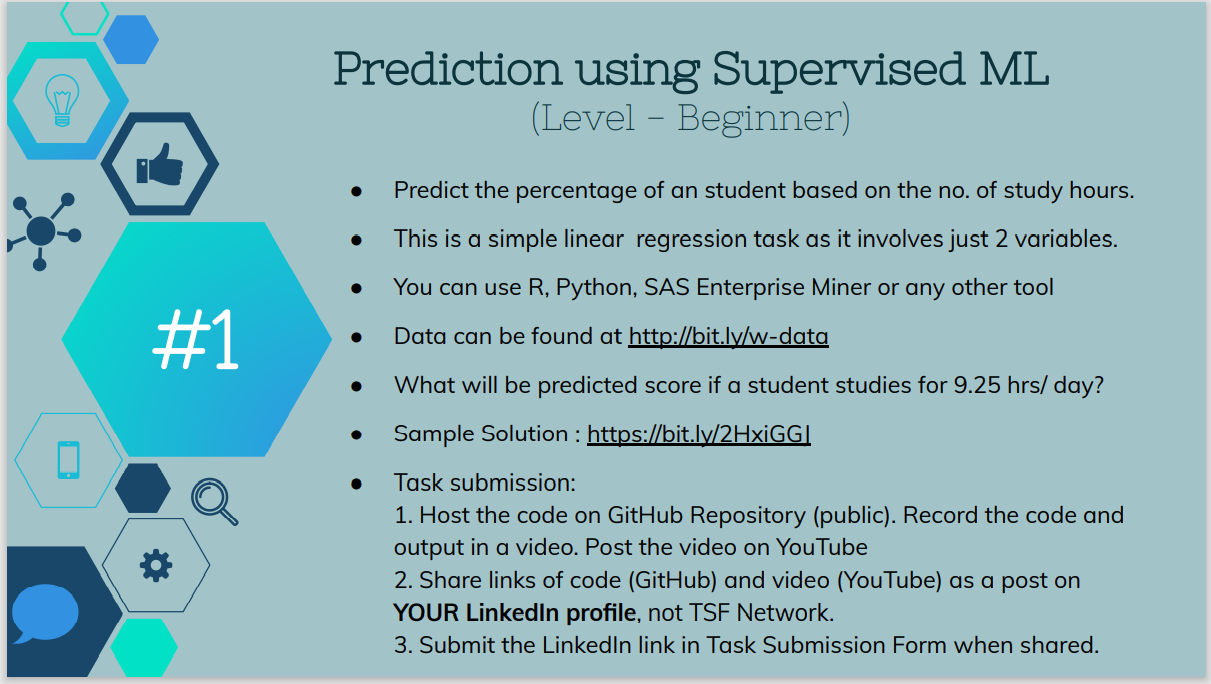

### Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the Dataset

In [21]:
study_data=pd.read_csv("http://bit.ly/w-data")
study_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Getting some info from the dataset

In [12]:
study_data.shape

(25, 2)

In [22]:
study_data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
study_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking the Relationship between the factors

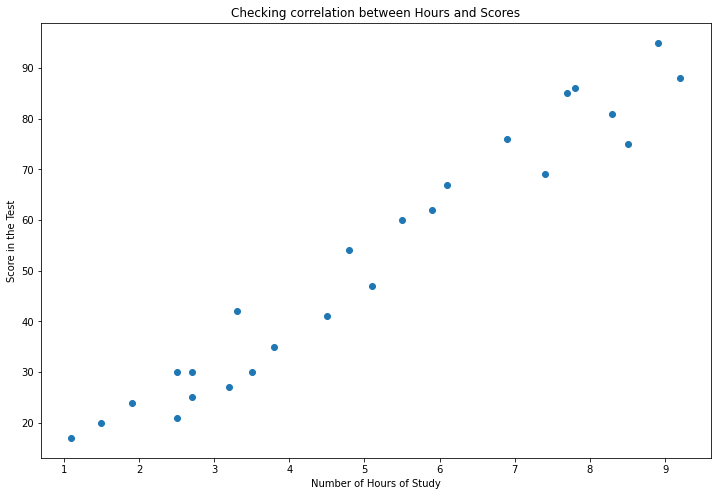

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(study_data["Hours"],study_data["Scores"])
plt.title("Checking correlation between Hours and Scores")
plt.xlabel("Number of Hours of Study")
plt.ylabel("Score in the Test")
plt.show()

## Checking for correlation using heatmap

<AxesSubplot:>

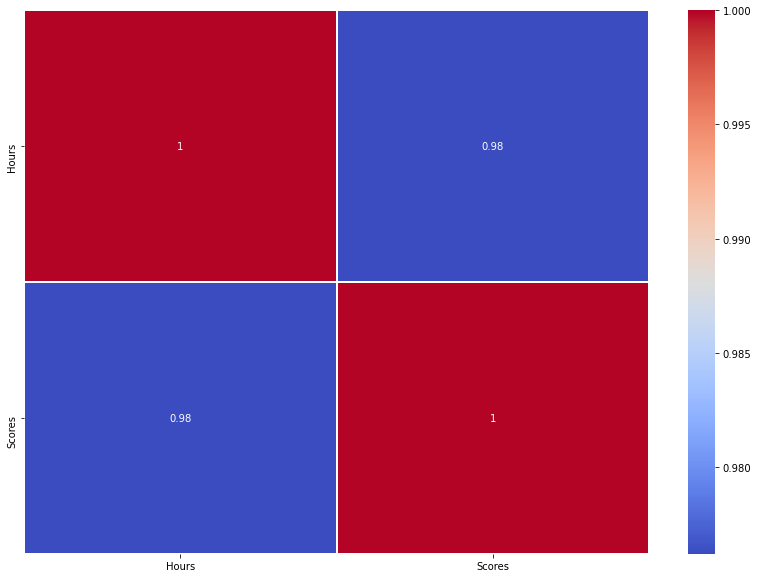

In [30]:
colormap=plt.cm.coolwarm
plt.figure(figsize=(14,10))
sns.heatmap(study_data.corr(),cmap=colormap, annot=True, linewidth=0.9)

The above correlation heatmap shows that the two variables hours and scores are highly correlated.

### Checking the distribution

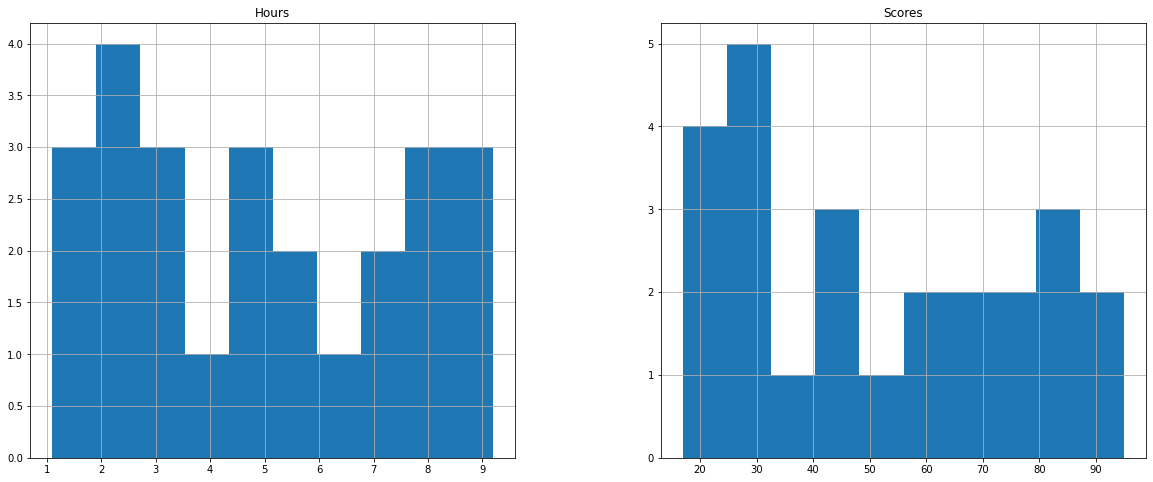

In [36]:
study_data.hist(figsize = (20,8))
plt.show()

### Fitting the Model

#### Dividing the data into features and targets

In [37]:
from sklearn.linear_model import LinearRegression
X = study_data.iloc[:, 0].values.reshape(-1, 1)  
Y = study_data.iloc[:, 1].values.reshape(-1, 1)

#### Splitting the data into Train test Split

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

#### Training the data

In [47]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)      # perform linear regression
y_pred = linear_regressor.predict(x_test)   # make predictions

#### Plotting the Regression line

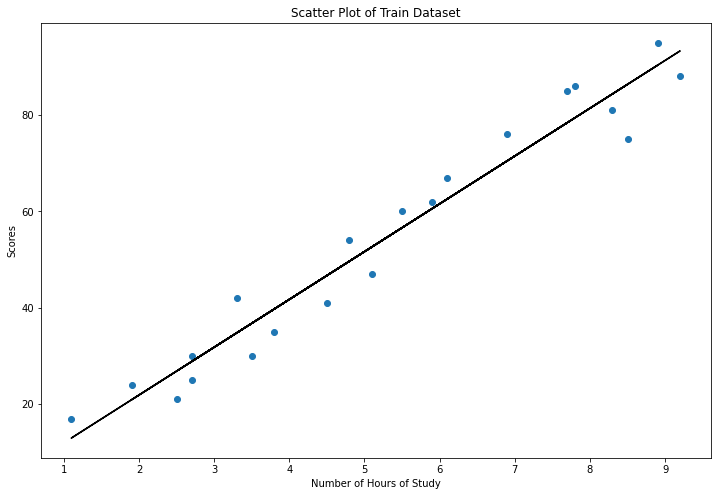

In [49]:
plt.figure(figsize=(12,8))
m=linear_regressor.coef_
b=linear_regressor.intercept_
line = m*x_train+b
plt.scatter(x_train, y_train)
plt.plot(x_train, line,color="black")
plt.title("Scatter Plot of Train Dataset")
plt.xlabel("Number of Hours of Study")
plt.ylabel("Scores")
plt.show()

### Comparing Actual vs Predicted Values

In [51]:
pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
pred_df

,Actual,Predicted
0,20,16.927148
1,27,33.788269
2,69,75.445158
3,30,26.845455


### Evaluating the Model

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [53]:
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error :  4.86520601926534
Mean Squared Error :  26.753558100750865
Root Mean Squared Error :  5.172384179539534


### Predicting the Values

In [60]:
x_new = [[9.25]]
y_pred = linear_regressor.predict(x_new)
print("Number of Hours of Study: ",x_new[0][0])
print("The score for {} hours of study will be {}.".format(x_new[0][0],y_pred[0][0]))

Number of Hours of Study:  9.25
The score for 9.25 hours of study will be 93.79402490359651.
